The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

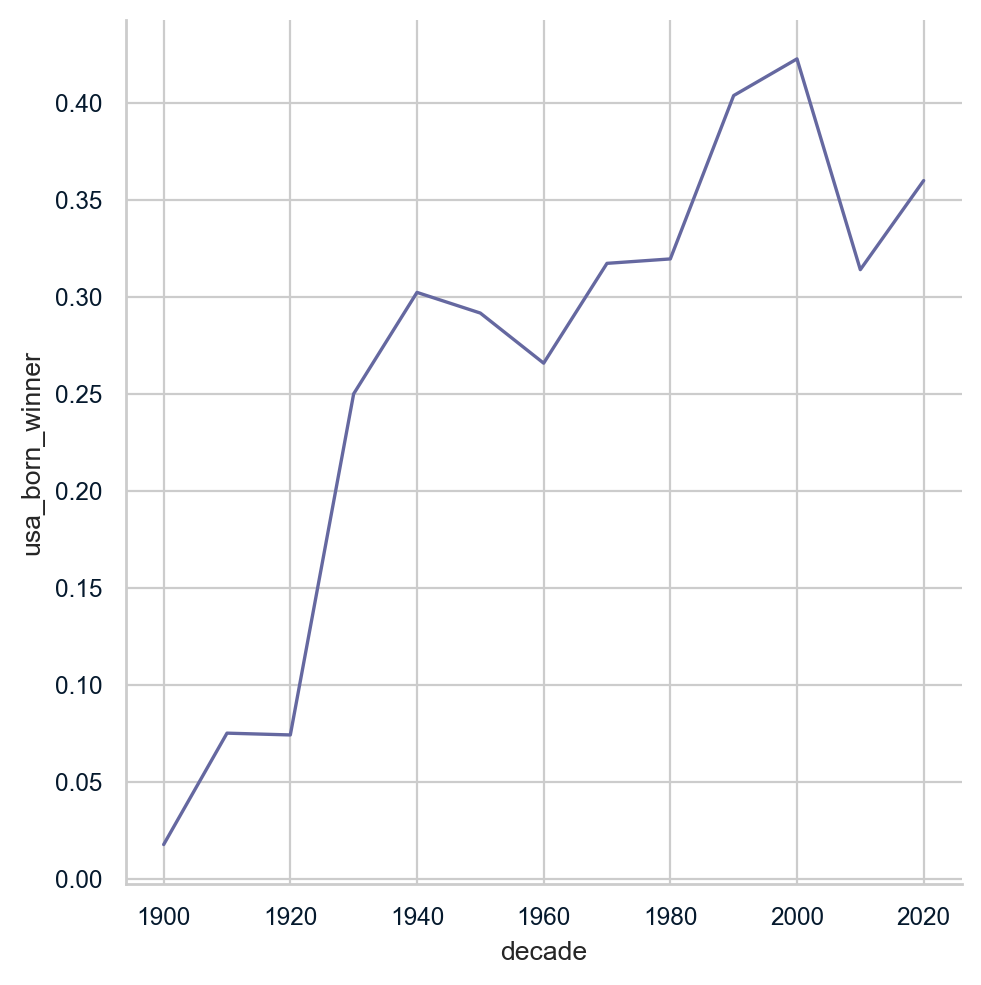

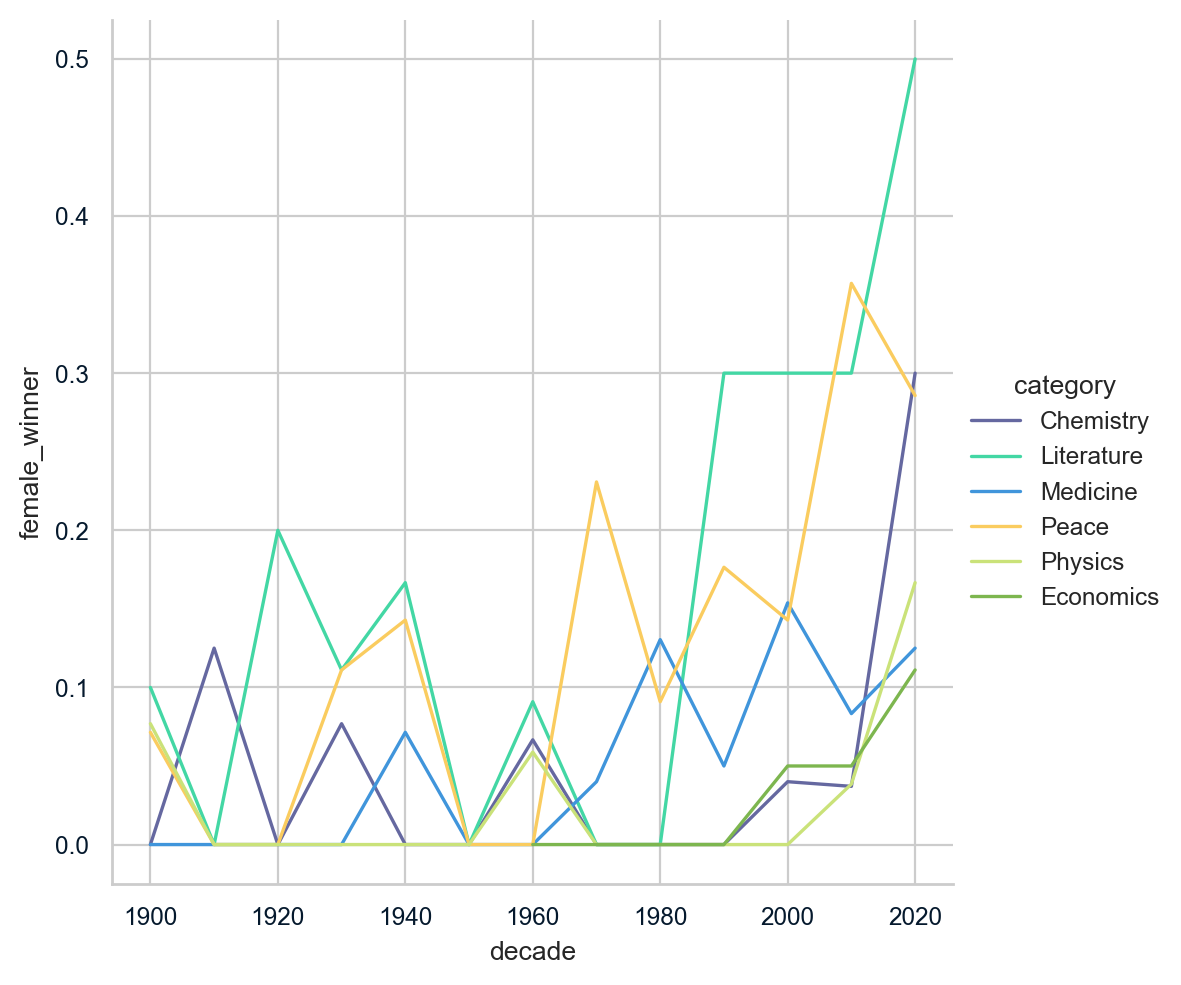

In [63]:
import pandas as pd
import seaborn as sns
import numpy as np

file_path = 'data/nobel.csv'

nobel = pd.read_csv(file_path)
nobel.info()
nobel.head()

# Identifing the decade with the highest ratio of US-born winners

top_gender = nobel['sex'].value_counts().index[0]
print(f'\n The most commonly awarded gender of Nobel Prize winners is: {top_gender}.')

top_country = nobel['birth_country'].value_counts().index[0]
print(f'\n The most common birth country of Nobel Prize winners is: {top_country}')

nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

prop_usa_winner = nobel.groupby('decade', as_index= False)['usa_born_winner'].mean()
max_decade_usa = prop_usa_winner[prop_usa_winner['usa_born_winner'] == prop_usa_winner['usa_born_winner'].max()]['decade'].values[0]
print(f"\n The hightest ratio of US-born Nobel Prize winners is in {max_decade_usa}.")

decade_usa_plt = sns.relplot(x = 'decade', y = 'usa_born_winner', data = prop_usa_winner, kind = 'line')


# Finding the decade and category with the highest proportion of female laureates

nobel['female_winner'] = nobel['sex'] == 'Female'

nobel_female_winner_cat = nobel.groupby(['decade', 'category'], as_index = False)['female_winner'].mean()

max_nobel_female_winner_cat = nobel_female_winner_cat[nobel_female_winner_cat['female_winner'] == nobel_female_winner_cat['female_winner'].max()][['decade', 'category']]

max_female_dict = {max_nobel_female_winner_cat['decade'].values[0]: max_nobel_female_winner_cat['category'].values[0]}
print(max_female_dict)

max_nobel_female_winner_plot = sns.relplot(x = 'decade', y = 'female_winner', hue = 'category', data = nobel_female_winner_cat, kind = 'line')

# finding the first woman to receive a Nobel Prize, and in respective category

nobel_women = nobel[nobel['female_winner']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]

print(f"\n The first women to win a Nobel Prize was {first_woman_name} in {first_woman_category} category.")

# Determining repeat winners

counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)
print(counts)
print(f"\n The repeated winners are {repeat_list}.")